In [211]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import random


plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=14) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels
plt.rc('legend', fontsize=14) #fontsize of the legend

In [212]:
d1 = pd.read_csv('Alexa Fluor 488.csv', index_col=0)
d2 = pd.read_csv('Alexa Fluor 555.csv', index_col=0)

In [213]:
error = np.random.rand(650) * 5 # Error weight factor
s = np.random.uniform(0, 1)

e1 = d1['Emission'] * s
e2 = d2['Emission'] * (1 - s)

e3 = e1 + e2 + error

wl = d1.index.values

In [214]:
# probably the best way is a least squares regression

In [233]:
np.random.seed(15)

x = np.random.uniform() 
y = np.random.uniform()

e1_hat = (e1.values / e1.values.max()) * 100 * x
e2_hat = (e2.values / e2.values.max()) * 100 * y
e3_hat = e1_hat + e2_hat

residuals = (e3 - e3_hat) ** 2

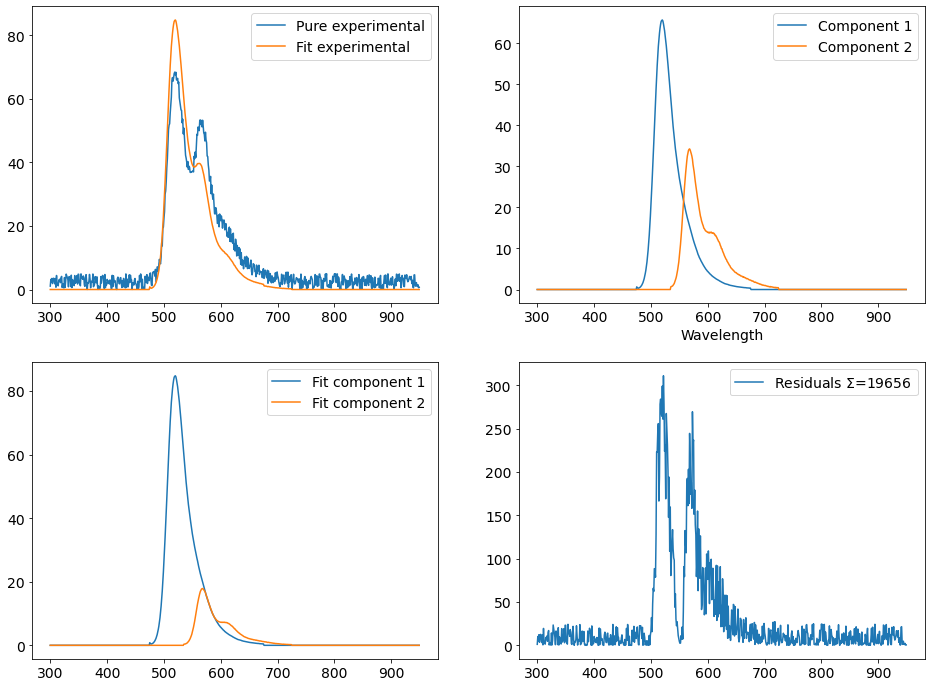

In [234]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
ax = np.reshape(ax, 4)

ax[0].plot(wl, e3.values, label='Pure experimental')
ax[0].plot(wl, e3_hat, label='Fit experimental')

e1.plot(ax=ax[1], label='Component 1')
e2.plot(ax=ax[1], label='Component 2')

ax[2].plot(wl, e1_hat, label='Fit component 1')
ax[2].plot(wl, e2_hat, label='Fit component 2')

ax[3].plot(wl, residuals, label=f'Residuals $\Sigma$={round(residuals.sum())}')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

plt.show()